<a href="https://colab.research.google.com/github/Tanaka-code/Portfolio-optimisation-codes/blob/master/tanaka_makuvaza_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
from scipy.stats import randint as sp_randint

from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
np.random.seed(1000)
import scipy.stats as scs
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [0]:
!pip3 install yfinance --upgrade

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=750196eb62959c5cb6236a745bef80fabd04eea1164ba766b5a92c9017729df9
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
import yfinance as yf
dta=yf.download ("^GSPC AMZN XOM JPM SBUX V KO MSFT AAPL GOOG BAC KHC KHC WMT RDS MAR IBM NVDA MA PYPL INTC F TOT",start="2009-01-01",end="2019-12-31")

[*********************100%***********************]  22 of 22 completed


In [0]:
SP500=dta['Adj Close']['^GSPC']
amazon=dta['Adj Close']['AMZN']
EXXOM=dta['Adj Close']['XOM']
JPMorgan=dta['Adj Close']['JPM']
Visa=dta['Adj Close']['V']
starbucks=dta['Adj Close']['SBUX']
cocacola=dta['Adj Close']['KO']
microsoft=dta['Adj Close']['MSFT']
apple=dta['Adj Close']['AAPL']
google=dta['Adj Close']['GOOG']
BankOfAmerica=dta['Adj Close']['BAC']
#Heinz=dta['Adj Close']['KHC']
Walmart=dta['Adj Close']['WMT']
RoyalDutchShell=dta['Adj Close']['RDS']
Marriot=dta['Adj Close']['MAR']
IBM=dta['Adj Close']['IBM']
NVIDIA=dta['Adj Close']['NVDA']
Mastercard=dta['Adj Close']['MA']
Total=dta['Adj Close']['TOT']
Intel=dta['Adj Close']['INTC']
Ford=dta['Adj Close']['F']
#Hilton=dta['Adj Close']['HLT']
data=pd.DataFrame(SP500.values,columns=['^GSPC'])
data['AMZN']=amazon.values
data['XOM']=EXXOM.values
data['JPM']=JPMorgan.values
data['V']=Visa.values
data['SBUX']=starbucks.values
data['KO']=cocacola.values
data['MFST']=microsoft.values
data['AAPL']=apple.values
data['GOOG']=google.values
data['BAC']=BankOfAmerica.values
#data['KHS']=Heinz.values
data['WMT']=Walmart.values
data['RDS']=RoyalDutchShell.values
data['MAR']=Marriot.values
data['IBM']=IBM.values
data['NVDA']=NVIDIA.values
data['MA']=Mastercard.values
data['TOT']=Total.values
data['INTC']=Intel.values
data['F']=Ford.values
#data['HLT']=Hilton.values

In [0]:
data.head()

,^GSPC,AMZN,XOM,JPM,V,SBUX,KO,MFST,AAPL,GOOG,BAC,WMT,RDS,MAR,IBM,NVDA,MA,TOT,INTC,F
0,931.799988,54.360001,56.937794,23.964485,10.705006,4.154112,14.492252,15.592469,11.223147,160.060059,12.733791,43.284206,3.89,16.327370,61.261627,8.016504,12.208875,30.799044,10.675894,1.729129
1,927.450012,54.060001,56.930786,22.359205,10.781126,4.187884,14.347014,15.738195,11.696809,163.412491,12.422776,42.784599,4.05,16.937811,60.875973,8.163763,12.492537,30.269320,10.472207,1.813477
2,934.700012,57.360001,56.003220,22.840784,11.540335,4.314535,14.116528,15.922266,11.503882,166.406265,12.689362,42.406101,3.92,17.605228,62.565826,8.439878,13.206583,30.114136,10.795296,1.939998
3,906.650024,56.200001,54.573521,21.472479,11.289938,4.217435,14.185989,14.963554,11.255305,160.403763,12.182853,42.042755,4.41,16.221558,61.556126,7.933669,12.511368,29.348984,10.142094,1.890795
4,909.729980,57.160000,55.159340,20.807432,11.169745,4.280760,14.283875,15.431399,11.464305,161.987823,12.031786,38.893711,4.14,16.644804,61.128410,7.731187,12.569782,29.948271,10.219356,1.890795


In [0]:
price=data.dropna()

In [0]:
price

,^GSPC,AMZN,XOM,JPM,V,SBUX,KO,MFST,AAPL,GOOG,BAC,WMT,RDS,MAR,IBM,NVDA,MA,TOT,INTC,F
0,931.799988,54.360001,56.937794,23.964485,10.705006,4.154112,14.492252,15.592469,11.223147,160.060059,12.733791,43.284206,3.890,16.327370,61.261627,8.016504,12.208875,30.799044,10.675894,1.729129
1,927.450012,54.060001,56.930786,22.359205,10.781126,4.187884,14.347014,15.738195,11.696809,163.412491,12.422776,42.784599,4.050,16.937811,60.875973,8.163763,12.492537,30.269320,10.472207,1.813477
2,934.700012,57.360001,56.003220,22.840784,11.540335,4.314535,14.116528,15.922266,11.503882,166.406265,12.689362,42.406101,3.920,17.605228,62.565826,8.439878,13.206583,30.114136,10.795296,1.939998
3,906.650024,56.200001,54.573521,21.472479,11.289938,4.217435,14.185989,14.963554,11.255305,160.403763,12.182853,42.042755,4.410,16.221558,61.556126,7.933669,12.511368,29.348984,10.142094,1.890795
4,909.729980,57.160000,55.159340,20.807432,11.169745,4.280760,14.283875,15.431399,11.464305,161.987823,12.031786,38.893711,4.140,16.644804,61.128410,7.731187,12.569782,29.948271,10.219356,1.890795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,2444.239990,946.020020,68.445801,84.899590,102.106735,51.381325,41.509968,70.003822,155.375107,913.809998,22.418581,73.664780,370.000,97.449364,125.796967,163.659317,131.805969,44.552490,32.438599,9.272781
2185,2465.100098,979.469971,70.737167,82.054161,102.874161,50.502930,42.295929,71.455215,155.173035,935.950012,21.820776,75.637856,370.000,98.465370,126.141251,165.256531,134.445084,45.989117,33.271805,9.797007
2186,2461.429932,965.900024,70.549210,81.952209,102.746254,50.521820,42.314217,71.109200,152.642319,926.500000,21.744780,74.467216,370.000,100.081284,125.744011,162.389481,135.124542,45.438549,32.944134,9.762630
2191,2500.229980,986.789978,71.668045,84.918121,103.602242,51.636345,42.540359,72.387573,153.845123,920.289978,23.160233,75.883286,370.000,101.977837,127.836067,178.679016,139.417923,46.333218,34.638618,9.986071


In [0]:
# Dropping 'Not a Number' columns for Dow Chemicals (DWDP) and Visa (V)
#df.drop(['DWDP', 'V'], axis=1, inplace=True)
# Copying the dataframe to add features
data = price
# Daily Returns
# Daily Log Returns (%)
# datareturns = np.log(data / data.shift(1)) 

# Daily Linear Returns (%)
datareturns = data.pct_change(1)

# Dow Jones Equal Weighted rETURN
datareturns["^GSPC"] = datareturns.mean(axis=1)

# Data Raw
data_raw = datareturns
data_raw.dropna(how='all', inplace=True)

# Normalizing the returns
data = (data_raw - data_raw.mean()) / data_raw.std()

# Getting rid of the NaN values.
data.dropna(how='any', inplace=True)
data_raw.dropna(how='any', inplace=True)

In [0]:
data

,^GSPC,AMZN,XOM,JPM,V,SBUX,KO,MFST,AAPL,GOOG,BAC,WMT,RDS,MAR,IBM,NVDA,MA,TOT,INTC,F
1,-0.135800,-0.227863,-0.025233,-2.096493,0.253047,0.170669,-0.785665,0.363024,1.177695,0.888038,-0.325229,-0.990991,-0.136949,1.151199,-0.419251,0.397162,0.813859,-0.864335,-0.867740,0.306666
2,-0.120344,1.654682,-1.265374,0.619414,3.213393,0.786185,-1.227651,0.468944,-0.545562,0.768711,0.239084,-0.769378,-0.140539,1.216242,1.642820,0.789713,2.109846,-0.275221,1.278705,0.449340
3,-0.166446,-0.643741,-1.973728,-1.879293,-1.094025,-0.682079,0.307154,-2.772306,-0.695704,-1.704300,-0.515756,-0.746497,-0.132838,-2.590040,-1.015272,-1.593159,-2.084810,-1.264917,-2.648690,-0.197389
4,-0.142743,0.411340,0.807488,-0.991596,-0.577256,0.362325,0.451927,1.351056,0.483818,0.384750,-0.177343,-6.199337,-0.141967,0.786823,-0.458803,-0.717841,0.104616,0.971370,0.279916,-0.024966
5,-0.162304,-0.888193,-1.489762,-1.450255,-0.196858,-1.071325,-1.087391,-1.402433,-0.732730,-1.479186,-0.524418,0.277832,-0.135413,-1.348263,-1.760604,-1.490887,-0.758881,-2.056467,-1.229345,-0.176603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,-0.140180,-0.049038,-0.265715,-0.138200,0.115103,-0.035147,-0.293463,-0.052044,0.234339,-0.167511,-0.050709,-0.669410,-0.138966,-0.038789,-0.556222,0.110406,0.242797,0.107221,-0.072367,-0.043815
2185,-0.127787,0.928254,2.551729,-1.069620,0.271994,-0.531500,1.332052,0.876299,-0.099513,1.037324,-0.352793,2.159656,-0.138966,0.281496,0.127662,0.178434,0.691177,1.548469,1.056612,0.359374
2186,-0.144862,-0.463615,-0.219582,-0.079497,-0.137588,-0.045218,-0.021096,-0.276517,-0.540132,-0.523318,-0.067673,-1.314417,-0.138966,0.474554,-0.228750,-0.510222,0.119320,-0.609237,-0.470925,-0.048821
2191,-0.116242,0.539901,1.200506,1.068950,0.310111,0.558435,0.338146,0.752098,0.170006,-0.369002,0.775733,1.521050,-0.138966,0.556460,0.969381,2.478796,1.140091,0.935762,2.163532,0.130632


In [0]:
# Taking away the market benchmark SP500
stock_tickers = data.columns.values[:-1]
n_tickers = len(stock_tickers)

# Dividing the dataset into training and testing sets
percentage = int(len(data) * 0.8)
X_train = data[:percentage]
X_test = data[percentage:]

X_train_raw = data_raw[:percentage]
X_test_raw = data_raw[percentage:]

# Applying Principle Component Analysis
# Creating covariance matrix and training data on PCA.
cov_matrix = X_train.loc[:,X_train.columns != '^GSPC'].cov()
pca = PCA()
pca.fit(cov_matrix)




PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
projected = pca.fit_transform(cov_matrix)
pcs = pca.components_

4 principal components explain 95.00% of variance


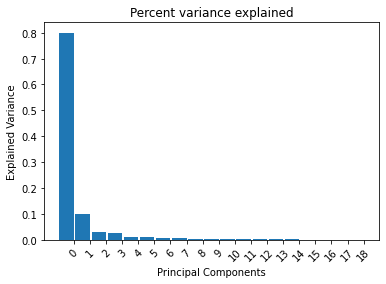

In [0]:
def plotPCA(plot=False):

    # Visualizing Variance against number of principal components.
    cov_matrix = X_train.loc[:,X_train.columns != '^GSPC'].cov()

    var_threshold = 0.95
    var_explained = np.cumsum(pca.explained_variance_ratio_)
    num_comp = np.where(np.logical_not(var_explained < var_threshold))[0][0] + 1  

    if plot:
        print('%d principal components explain %.2f%% of variance' %(num_comp, 100* var_threshold))

        # PCA percent variance explained.
        bar_width = 0.9
        n_asset = stock_tickers.shape[0]
        x_indx = np.arange(n_asset)
        fig, ax = plt.subplots()

        # Eigenvalues measured as percentage of explained variance.
        rects = ax.bar(x_indx, pca.explained_variance_ratio_[:n_asset], bar_width)
        ax.set_xticks(x_indx + bar_width / 2)
        ax.set_xticklabels(list(range(n_asset)), rotation=45)
        ax.set_title('Percent variance explained')
        ax.set_ylabel('Explained Variance')
        ax.set_xlabel('Principal Components')
        plt.show()

plotPCA(plot=True)

In [0]:
pcs1=np.abs(pcs)

In [0]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

Eigen portfolio #12 with the highest Sharpe. Return nan%, vol = 17469.75%, Sharpe = nan
          Return         Vol        Sharpe
15  4.929489e+06   80.067354  61566.782096
7   4.099850e+06   80.140600  51158.217187
3   1.760536e+06   49.620485  35480.023907
17  2.630870e+06   75.219443  34975.926499
0   2.045491e+06   71.452357  28627.339954
4   1.009075e+06   36.218512  27860.749570
6   2.416089e+06  102.908519  23478.027427
14  9.096912e+05   54.721116  16624.135567
16  7.307170e+05   44.825693  16301.298579
5   5.293551e+05   41.864509  12644.482583


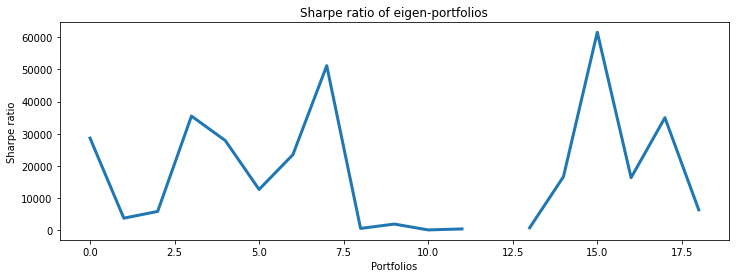

In [0]:
### code taken from github https://github.com/Gustrigos/Eigen-Portfolio ### 
def optimizedPortfolio():
    n_portfolios = len(pcs)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 

    for i in range(n_portfolios):
        
        pc_w = pcs1[:, i] / sum(pcs1[:, i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        
        eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen_prtfi / n_portfolios)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe

    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(10))

    plt.show()

optimizedPortfolio()

Sum of weights of current eigen-portfolio: 100.00


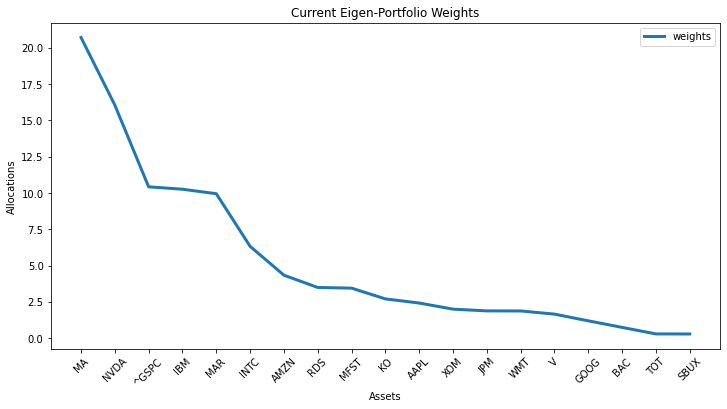

,weights
MA,20.710580
NVDA,16.053363
^GSPC,10.421596
IBM,10.257060
MAR,9.947623
INTC,6.323651
AMZN,4.334659
RDS,3.489383
MFST,3.442914
KO,2.701824


In [0]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 22 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pcs)):
        weights["weights_{}".format(i)] = pcs1[:, i] / sum(pcs1[:, i])

    weights = weights.values.T
    return weights

weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.xlabel("Assets")
        plt.ylabel("Allocations")
        plt.show()

    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
plotEigen(weights=weights[4], plot=True)

In [0]:
a=[20.7106,16.0534,10.4216,10.2571,9.9476,6.3237,4.3347,3.4894,3.4429,2.7018,2.4164,1.9965,1.8760,1.8708,1.6528,1.1906,0.7401]

In [0]:
np.std(a)

5.581275200154673

In [0]:
PCWeights()

array([[6.61274395e-02, 1.34736255e-02, 5.80030817e-02, 5.09506807e-02,
        9.18891050e-02, 6.07885456e-03, 4.87138030e-02, 4.05120292e-02,
        4.75416624e-02, 1.19491967e-01, 3.80673368e-02, 1.02498219e-01,
        7.59247161e-02, 2.40079814e-02, 8.15728167e-02, 3.29126501e-02,
        3.31808785e-02, 2.13466518e-02, 4.77065007e-02],
       [3.16451134e-02, 1.94502631e-01, 4.18283555e-02, 2.27347410e-02,
        2.81557022e-02, 6.59766654e-02, 1.69211548e-02, 2.29205218e-02,
        2.13581783e-02, 3.32785799e-02, 6.36503847e-02, 7.77469700e-02,
        2.13287526e-02, 5.44100630e-02, 3.24219910e-02, 1.57979782e-02,
        6.50542154e-02, 4.80739796e-02, 1.42194023e-01],
       [7.64658605e-02, 7.61180409e-03, 4.25919963e-03, 1.65628569e-02,
        2.26515628e-02, 1.08158251e-01, 1.27416043e-02, 2.84388293e-02,
        1.54508603e-01, 5.80276749e-02, 7.62977573e-02, 2.99899822e-02,
        2.74610321e-02, 3.11052020e-02, 1.01497599e-01, 2.43412233e-02,
        5.34874070e-02